<a href="https://colab.research.google.com/github/pranavdevi28/Rossmann_Sales_Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##Import required liabraries

In [1]:
#importing required liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing Rossmann stores dataset
rm_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Rossmann Sales Prediction/Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
rm_df.shape

(1017209, 9)

In [5]:
#importing store dataset
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Rossmann Sales Prediction/store.csv')

In [6]:
store_df.shape

(1115, 10)

In [7]:
rm_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
rm_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [9]:
rm_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
rm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


##Checking duplicate and null values

In [11]:
#checking for duplicate records
print(f'Total number of duplicate records: {len(rm_df[rm_df.duplicated()])}')

Total number of duplicate records: 0


In [12]:
#checking null values
rm_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

As we can see, there are no duplicate record and no null values present in the dataset.

##Feature engineering for sales data

Let's convert type for 'Date' column to datetime

In [13]:
#converting date columns to datetime
import datetime as dt
rm_df["Date"] = pd.to_datetime(rm_df["Date"], format="%Y-%m-%d")

In [14]:
#creating separate columns for year, month, day and week number
rm_df['Year'] = rm_df["Date"].dt.year
rm_df['Month'] = rm_df["Date"].dt.month
rm_df['Day'] = rm_df["Date"].dt.day
rm_df['Week'] = rm_df["Date"].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


Let's create dummy variable for 'StateHoliday' column

In [15]:
#categorical column
rm_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [16]:
#replacing 0 with '0'
rm_df['StateHoliday'] = rm_df['StateHoliday'].replace({0:'n', '0':'n'})

In [17]:
rm_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week'],
      dtype='object')

In [18]:
#creating dummy variable for 'StateHoliday' columns
# rm_df = pd.get_dummies(data=rm_df, columns=['StateHoliday'])

In [19]:
#rearrangeing the columns for dataframe
column_list = list(rm_df.columns)
index_list =[0,2,8,9,11,10,1,4,5,6,7,12,3] #list of new index

new_list = [column_list[i] for i in index_list] #list of new column

rm_df = rm_df.reindex(columns = new_list)

Analysing the data when store was closed (0 value in 'Open' column)

In [20]:
rm_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [21]:
rm_df[rm_df['Open']==0]['Sales'].describe()

count    172817.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Sales, dtype: float64

We have 172817 records where the store was closed. For all these records the sales are 0, so we can drop these records as there are not contributuing for our sales prediction.

In [22]:
#getting index for all rows where 'Open' column has value '0'
closed = rm_df[rm_df['Open'] == 0].index

In [23]:
#dropping the rows
rm_df.drop(closed, inplace = True)

In [24]:
#as we have only single value for 'Open' value, we can drop 'Open' columns
rm_df['Open'].value_counts()

1    844392
Name: Open, dtype: int64

In [25]:
#droping 'Open' column
rm_df.drop('Open', axis=1, inplace=True)

In [26]:
print(rm_df.shape)
rm_df.head()

(844392, 12)


,Store,Date,SchoolHoliday,Year,Day,Month,DayOfWeek,Customers,Promo,StateHoliday,Week,Sales
0,1,2015-07-31,1,2015,31,7,5,555,1,n,31,5263
1,2,2015-07-31,1,2015,31,7,5,625,1,n,31,6064
2,3,2015-07-31,1,2015,31,7,5,821,1,n,31,8314
3,4,2015-07-31,1,2015,31,7,5,1498,1,n,31,13995
4,5,2015-07-31,1,2015,31,7,5,559,1,n,31,4822


In [27]:
#discrete columns 
for col in rm_df.columns:
  if rm_df[col].nunique() <= 20:
    print(f'{col}: {rm_df[col].unique()}')


SchoolHoliday: [1 0]
Year: [2015 2014 2013]
Month: [ 7  6  5  4  3  2  1 12 11 10  9  8]
DayOfWeek: [5 4 3 2 1 7 6]
Promo: [1 0]
StateHoliday: ['n' 'a' 'b' 'c']


In [28]:
rm_df.groupby(by='Year')['Sales'].sum()

Year
2013    2302876084
2014    2180804896
2015    1389499643
Name: Sales, dtype: int64

In [29]:
rm_df.groupby(by='Year')['Customers'].sum()

Year
2013    256004425
2014    240488971
2015    147548359
Name: Customers, dtype: int64

As we can see, we have data for 3 years and we can see that number of customers and hence the sales are reducing year over year.

In [30]:
#number of store in sales dataset
rm_df['Store'].nunique()

1115

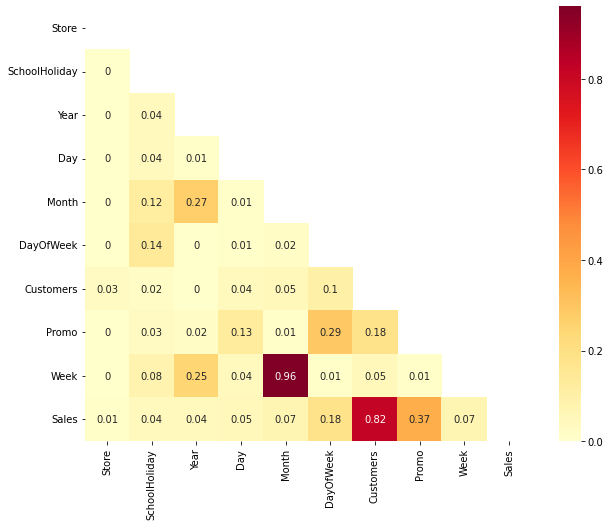

In [31]:
corr = rm_df.corr()

#creating heatmap
plt.figure(figsize=(10,8))
sns.heatmap(round(abs(corr),2), annot=True, cmap='YlOrRd', mask=np.triu(corr))


Analysing Store dataset

In [32]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [33]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [34]:
#checking for duplicate records
print(f'Dupliacate records in store dataset: {len(store_df[store_df.duplicated()])}')

Dupliacate records in store dataset: 0


In [35]:
#checking null values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [36]:
for col in store_df.columns:
  if store_df[col].nunique()<20:
    print(f'{col}: {store_df[col].unique()}')

StoreType: ['c' 'a' 'd' 'b']
Assortment: ['a' 'c' 'b']
CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Promo2: [0 1]
Promo2SinceYear: [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval: [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [37]:
promo_null = store_df[(store_df['Promo2SinceWeek'].isna()) & (store_df['Promo2SinceYear'].isna()) & (store_df['PromoInterval'].isna()) ]

In [38]:
promo_null.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


In [39]:
promo_null['Promo2'].value_counts()

0    544
Name: Promo2, dtype: int64

As we know 'Promo2' is 0 if the store did not participate in the promo, so we can conclude that the columns **Promo2SinceYear**, **Promo2SinceWeek** and **PromoInterval** are having Null values when the store did not participate for the promo2.

So, we can impute the null values for these 3 columns with 0.

In [40]:
#imputing the value with 0
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


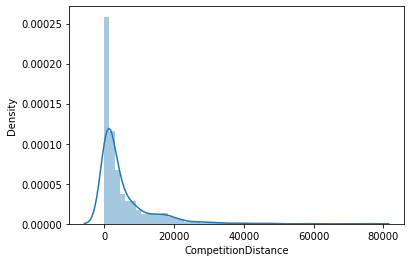

In [41]:
sns.distplot(store_df['CompetitionDistance'])

In [42]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)

Handling Null values for '**CompetitionOpenSinceMonth**' and '**CompetitionOpenSinceYear**'

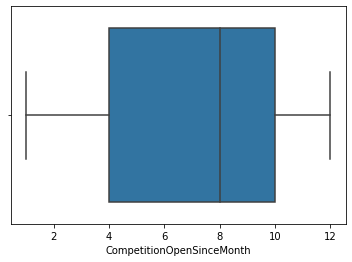

In [43]:
sns.boxplot(data=store_df, x='CompetitionOpenSinceMonth')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


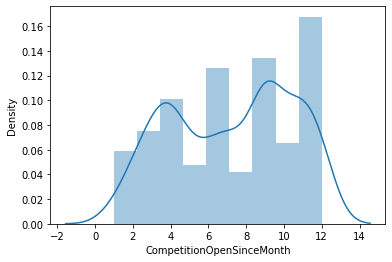

In [44]:
sns.distplot(store_df['CompetitionOpenSinceMonth'])

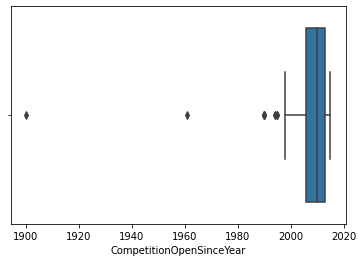

In [45]:
sns.boxplot(data=store_df, x='CompetitionOpenSinceYear')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


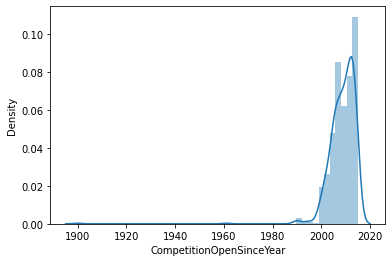

In [46]:
sns.distplot(store_df['CompetitionOpenSinceYear'])

As we can see, there are outliers so we will impute the values with median for respective columns

In [47]:
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].median(), inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].median(), inplace=True)

In [48]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

We have imputed all Null values.

Let's merge both the datasets to create a new one in order to perform Exploraty Data Analysis

In [49]:
final_df = pd.merge(rm_df, store_df, how='left', on='Store')

In [50]:
final_df.shape

(844392, 21)

In [51]:
final_df.head()

,Store,Date,SchoolHoliday,Year,Day,Month,DayOfWeek,Customers,Promo,StateHoliday,Week,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2015-07-31,1,2015,31,7,5,555,1,n,31,5263,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,2015-07-31,1,2015,31,7,5,625,1,n,31,6064,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,2015-07-31,1,2015,31,7,5,821,1,n,31,8314,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,2015-07-31,1,2015,31,7,5,1498,1,n,31,13995,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,2015-07-31,1,2015,31,7,5,559,1,n,31,4822,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [52]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   Date                       844392 non-null  datetime64[ns]
 2   SchoolHoliday              844392 non-null  int64         
 3   Year                       844392 non-null  int64         
 4   Day                        844392 non-null  int64         
 5   Month                      844392 non-null  int64         
 6   DayOfWeek                  844392 non-null  int64         
 7   Customers                  844392 non-null  int64         
 8   Promo                      844392 non-null  int64         
 9   StateHoliday               844392 non-null  object        
 10  Week                       844392 non-null  int64         
 11  Sales                      844392 non-null  int64   

In [53]:
#converting data types
final_df['CompetitionOpenSinceMonth'] = final_df['CompetitionOpenSinceMonth'].astype(int)
final_df['CompetitionOpenSinceYear'] = final_df['CompetitionOpenSinceYear'].astype(int)

final_df['Promo2SinceWeek'] = final_df['Promo2SinceWeek'].astype(int)
final_df['Promo2SinceYear'] = final_df['Promo2SinceYear'].astype(int)

final_df['CompetitionDistance'] = final_df['CompetitionDistance'].astype(int)


##Exploratoty Data Analysis

Text(0.5, 1.0, 'Total stores of each store type')

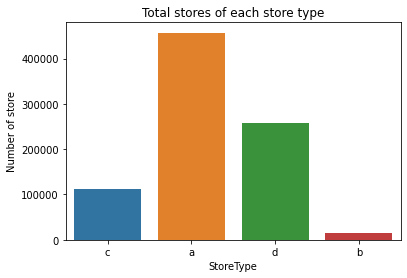

In [204]:
#total stores of each type
sns.countplot(data = final_df, x='StoreType')
plt.ylabel('Number of store')
plt.title('Total stores of each store type')

Text(0.5, 1.0, 'Percentage of sales for each store type')

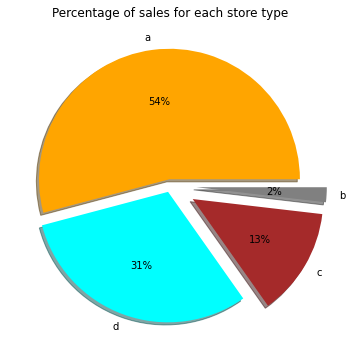

In [141]:
sales_per_store = final_df['StoreType'].value_counts()

plt.figure(figsize=(6,6))
explode = (0.05, 0.05, 0.2, 0.2)
colors = ( "orange", "cyan", "brown","grey")
plt.pie(sales_per_store.values, shadow = True, explode=explode, autopct='%1.0f%%', labels=list(sales_per_store.index), colors=colors)
plt.title('Percentage of sales for each store type')

Text(0.5, 1.0, 'Records per month')

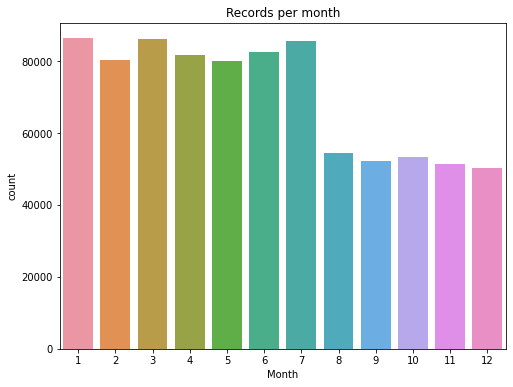

In [57]:
#number of records belonging to each month
plt.figure(figsize=(8,6))
sns.countplot(data=final_df, x='Month')
plt.title('Records per month')

Text(0.5, 1.0, 'Open stores on every day of a week')

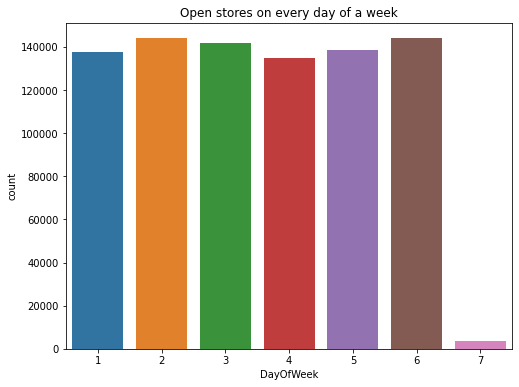

In [ ]:
#number of records belonging to each day of week

plt.figure(figsize=(8,6))
sns.countplot(data=final_df, x='DayOfWeek')
plt.title('Open stores on every day of a week')

As expected least number of stores are open on 7th day i.e. Sunday

Text(0, 0.5, 'Number of stores')

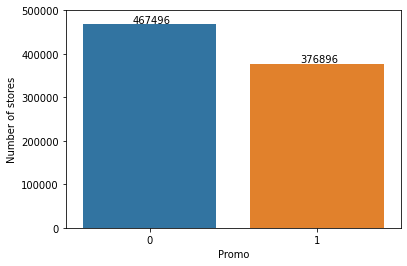

In [ ]:
#number of stores having and not having promo
promo_store = final_df.groupby(by='Promo')['Store'].count()
sns.countplot(data=final_df, x='Promo')

for index, value in enumerate(promo_store.values):
  plt.text(x=index-0.1, y= value+3000, s=value)

plt.ylim(0.0, 500000)
plt.ylabel('Number of stores')

Text(0.5, 1.0, 'Total sales vs Promo type')

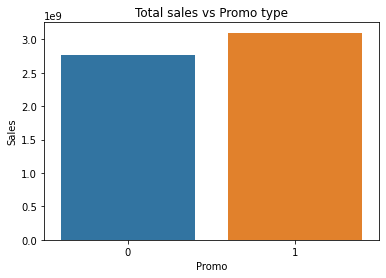

In [ ]:
store_promo = final_df.groupby('Promo')['Sales'].sum()
sns.barplot(x=store_promo.index, y=store_promo.values)
plt.ylabel('Sales')
plt.title('Total sales vs Promo type')

By looking at both above charts we can see that, comparitively there are less store which are runnning promo but those are having more sales than the stores which are not running promo.

In [ ]:
#percentage growth in averrage sales when Promo is running
promo_perc = final_df.groupby('Promo')['Sales'].mean()

round(((promo_perc.values[1]- promo_perc.values[0])/promo_perc.values[0])*100,2)

38.77

If we compare average of sales for stores where promo is running with average of sales for stores where promo is not running, we can see 38.77% growth in sales.

Text(0.5, 1.0, 'Percentage of Assortment type')

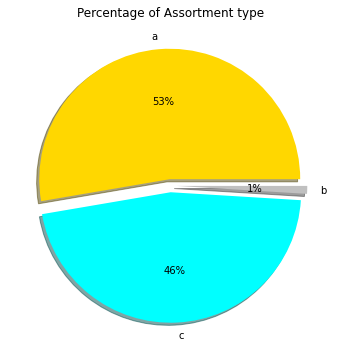

In [148]:
assort_count = final_df['Assortment'].value_counts()

plt.figure(figsize=(6,6))
explode = (0.05, 0.05, 0.05)
colors = ( "gold", "cyan","silver")
plt.pie(x=assort_count.values, shadow = True, explode=explode, autopct='%1.0f%%', labels=list(assort_count.index), colors=colors)
plt.title('Percentage of Assortment type')

Text(0.5, 1.0, 'Average sales per year')

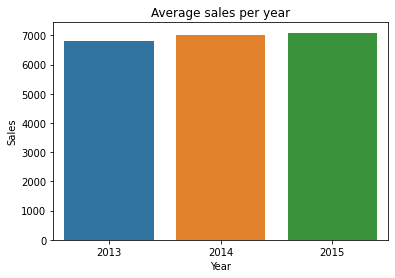

In [205]:
sales_YOY= final_df.groupby('Year')['Sales'].mean()

sns.barplot(x= sales_YOY.index, y=sales_YOY.values)
plt.ylabel('Sales')
plt.title('Average sales per year')

In [64]:
#monthly sales with and without promo
monthly_sales= pd.DataFrame(final_df.groupby(by=['Month', 'Promo'])['Sales'].sum()).reset_index()

In [65]:
growth = list(monthly_sales.values[:,2])
perc_increase =[]
i=0
while i<= len(growth):
  if i%2!=0:
    growth_over_prev = ((growth[i]-growth[i-1])/growth[i-1])*100
    perc_increase.append(round(growth_over_prev,2))
  i+=1

Text(0.5, 1.0, 'showing % growth in sales compared to non-Promo')

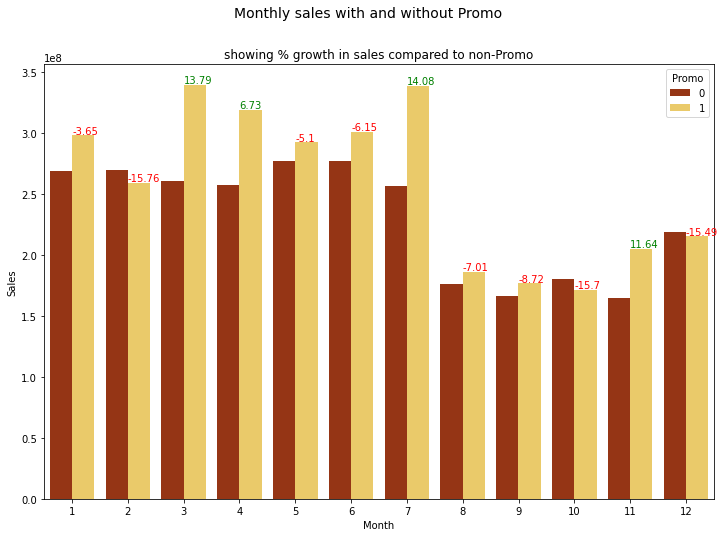

In [107]:
plt.figure(figsize=(12,8))
sns.barplot(data=monthly_sales, x='Month', y='Sales', hue='Promo', palette='afmhot')
for index , value in enumerate(perc_increase):
  
  if value>0:
    plt.text(x=index, y=growth[(index*2)+1]+1000000, s=value, fontsize=(10),  fontweight='book', c='g')
  else:
    plt.text(x=index, y=growth[(index*2)+1]+1000000, s=value, fontsize=(10),  fontweight='book', c='r')

plt.suptitle('Monthly sales with and without Promo', fontsize=14)
plt.title('showing % growth in sales compared to non-Promo')

Looking at above charts, we can conclude that total sales have incresed significantly most of the times when promo was running.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Average sales in each month for 3 years')

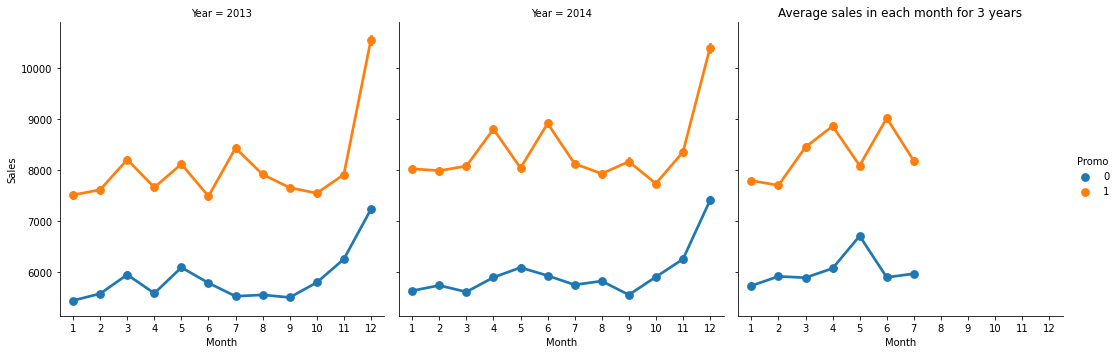

In [203]:
sns.factorplot(data=final_df, x='Month', y='Sales', col='Year', hue='Promo')
plt.title('Average sales in each month for 3 years')

As we can see, the sales are on the rise in December and when Promo is running the sales are really high.

Text(0.5, 1.0, 'Average sale on each day of a week')

<Figure size 720x432 with 0 Axes>

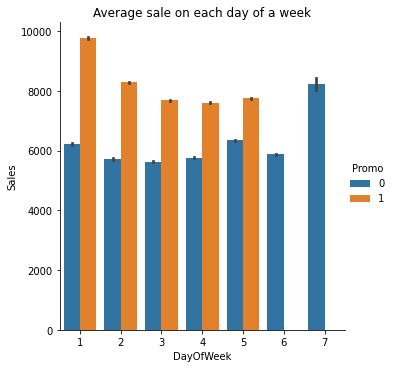

In [206]:
plt.figure(figsize=(10,6))
sns.catplot(data=final_df, x='DayOfWeek', y='Sales', kind='bar', hue='Promo')
plt.title('Average sale on each day of a week')

Looking at the average sale on each day of the week, we can conclude that sales are high on Monday when promo is running and though there is no promo on Sunday, still the sales are high.

Text(0.5, 1.0, 'Total customers on each day of week\n affected by School Holiday')

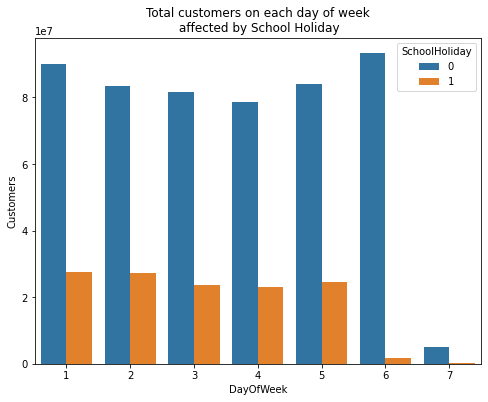

In [184]:
customer_per_day = pd.DataFrame(final_df.groupby(by=['DayOfWeek', 'SchoolHoliday'])['Customers'].sum()).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=customer_per_day, x='DayOfWeek', y='Customers', hue='SchoolHoliday')
plt.title('Total customers on each day of week\n affected by School Holiday')